# Linear models
* Linear regression
* Ridge
* Lasso
* LAD regression
* Huber regression
* Linear SVM

## Load data

In [1]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from training.creating_dataset import load_and_preprocess_data
from training.constants import FEATURES, DATASET_FILES, ORDERED_CHARACTERISTICS_FULL


bestiaries = load_and_preprocess_data(
    [f"../../pathfinder_2e_remaster_data/{f}" for f in DATASET_FILES], FEATURES
)

In [2]:
bestiaries.head()

,level,book,str,dex,con,int,wis,cha,ac,hp,...,poison_resistance,slashing_resistance,area-damage_weakness,cold_weakness,cold-iron_weakness,evil_weakness,fire_weakness,good_weakness,slashing_weakness,splash-damage_weakness
0,8,Pathfinder #164: Hands of the Devil,5.0,5.0,3.0,-2.0,3.0,4.0,28.0,152,...,0,0,0,0,0,0,0,0,0,0
1,5,Pathfinder #163: Ruins of Gauntlight,5.0,2.0,4.0,4.0,2.0,2.0,22.0,75,...,0,0,0,0,0,0,0,0,0,0
2,3,Pathfinder #163: Ruins of Gauntlight,4.0,3.0,1.0,1.0,3.0,1.0,18.0,48,...,0,0,0,0,0,0,0,0,0,0
3,3,Pathfinder #164: Hands of the Devil,1.0,4.0,1.0,0.0,3.0,1.0,20.0,30,...,5,0,0,0,0,0,0,0,0,0
4,8,Pathfinder #164: Hands of the Devil,5.0,5.0,5.0,2.0,4.0,5.0,27.0,120,...,10,0,0,0,0,0,0,0,0,0


In [3]:
bestiaries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3833 entries, 0 to 4506
Data columns (total 52 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   level                   3833 non-null   int64  
 1   book                    3833 non-null   object 
 2   str                     3833 non-null   float64
 3   dex                     3833 non-null   float64
 4   con                     3833 non-null   float64
 5   int                     3833 non-null   float64
 6   wis                     3833 non-null   float64
 7   cha                     3833 non-null   float64
 8   ac                      3833 non-null   float64
 9   hp                      3833 non-null   int32  
 10  perception              3833 non-null   float64
 11  fortitude               3833 non-null   float64
 12  reflex                  3833 non-null   float64
 13  will                    3833 non-null   float64
 14  focus                   3833 non-null   

Scale data using MinMaxScaler

In [4]:
columns = [col for col in bestiaries.columns if col not in ["book", "level"]]
scaler = MinMaxScaler()
min_max_df = pd.DataFrame()
min_max_df[columns] = pd.DataFrame(
    scaler.fit_transform(bestiaries[columns]), index=bestiaries.index
)
min_max_df["book"] = bestiaries["book"]
min_max_df["level"] = bestiaries["level"]
bestiaries = min_max_df
bestiaries = bestiaries[ORDERED_CHARACTERISTICS_FULL + ["book", "level"]]
bestiaries.head()

,str,dex,con,int,wis,cha,ac,hp,perception,fortitude,...,area-damage_weakness,cold_weakness,cold-iron_weakness,evil_weakness,fire_weakness,good_weakness,slashing_weakness,splash-damage_weakness,book,level
0,0.588235,0.588235,0.357143,0.200000,0.470588,0.529412,0.509434,0.252087,0.156522,0.425532,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Pathfinder #164: Hands of the Devil,8
1,0.588235,0.411765,0.428571,0.600000,0.411765,0.411765,0.396226,0.123539,0.130435,0.297872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Pathfinder #163: Ruins of Gauntlight,5
2,0.529412,0.470588,0.214286,0.400000,0.470588,0.352941,0.320755,0.078464,0.069565,0.170213,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Pathfinder #163: Ruins of Gauntlight,3
3,0.352941,0.529412,0.214286,0.333333,0.470588,0.352941,0.358491,0.048414,0.104348,0.170213,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Pathfinder #164: Hands of the Devil,3
4,0.588235,0.588235,0.500000,0.466667,0.529412,0.588235,0.490566,0.198664,0.156522,0.361702,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Pathfinder #164: Hands of the Devil,8


In [5]:
bestiaries.shape

(3833, 52)

In [6]:
bestiaries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3833 entries, 0 to 4506
Data columns (total 52 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   str                     3833 non-null   float64
 1   dex                     3833 non-null   float64
 2   con                     3833 non-null   float64
 3   int                     3833 non-null   float64
 4   wis                     3833 non-null   float64
 5   cha                     3833 non-null   float64
 6   ac                      3833 non-null   float64
 7   hp                      3833 non-null   float64
 8   perception              3833 non-null   float64
 9   fortitude               3833 non-null   float64
 10  reflex                  3833 non-null   float64
 11  will                    3833 non-null   float64
 12  focus                   3833 non-null   float64
 13  num_immunities          3833 non-null   float64
 14  land_speed              3833 non-null   

## Filter: get only bestiaries

In [8]:
import os
from training.splitting_dataset import split_dataframe, get_date_books_mapping


os.chdir("../../training")
books_dates_map = get_date_books_mapping()
os.chdir("../notebooks/models")

In [9]:
books_to_include = [
    book for _, row in books_dates_map["books"].iteritems() for book in row
]
bestiaries = bestiaries[bestiaries["book"].isin(books_to_include)]

In [10]:
os.chdir("../../training")
X_train, X_test, y_train, y_test = split_dataframe(bestiaries)
os.chdir("../notebooks/models")

In [11]:
X_train.size + X_test.size

81500

In [12]:
bestiaries[
    bestiaries["book"].str.contains("#", regex=False)
].size  # Adventure Paths have '#' in book/title

0

In [13]:
bestiaries.book.value_counts()

Pathfinder Bestiary                                    467
Pathfinder Bestiary 2                                  373
Pathfinder Bestiary 3                                  365
Pathfinder Kingmaker                                   181
Pathfinder Book of the Dead                             91
Pathfinder Gamemastery Guide                            83
Pathfinder Beginner Box                                 62
Pathfinder Abomination Vaults Hardcover Compilation      8
Name: book, dtype: int64

In [14]:
X_test.head()

,str,dex,con,int,wis,cha,ac,hp,perception,fortitude,...,poison_resistance,slashing_resistance,area-damage_weakness,cold_weakness,cold-iron_weakness,evil_weakness,fire_weakness,good_weakness,slashing_weakness,splash-damage_weakness
651,0.588235,0.470588,0.428571,0.000000,0.411765,0.176471,0.452830,0.148581,0.104348,0.340426,...,0.0,0.25,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
652,0.000000,0.705882,0.357143,0.666667,0.588235,0.705882,0.547170,0.290484,0.191304,0.382979,...,0.0,0.00,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0
656,0.411765,0.588235,0.285714,0.400000,0.411765,0.588235,0.396226,0.081803,0.095652,0.191489,...,0.0,0.25,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
657,0.588235,0.647059,0.428571,0.533333,0.411765,0.529412,0.490566,0.207012,0.139130,0.340426,...,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
659,0.647059,0.470588,0.428571,0.466667,0.647059,0.588235,0.490566,0.273790,0.156522,0.297872,...,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0


## Train models

In [13]:
from training.train_and_evaluate_models import train_and_evaluate_models


results = train_and_evaluate_models(
    [
        "linear_regression",
        "linear_regression_ridge",
        "linear_regression_lasso",
        "lad_regression",
        "huber_regression",
    ],
    X_train,
    y_train,
    X_test,
    y_test,
)

==== linear_regression ====
	--> train
		--> rmse: 0.5004325629728289
		--> mse: 0.25043275008355437
		--> mae: 0.3499345034317349
	--> test
		--> rmse: 0.8119215019113485
		--> mse: 0.6592165252659798
		--> mae: 0.4872711651826509

==== linear_regression_ridge ====
	--> train
		--> rmse: 0.5011735233513618
		--> mse: 0.251174900508418
		--> mae: 0.349536391320656
	--> test
		--> rmse: 0.81255791469997
		--> mse: 0.6602503647415636
		--> mae: 0.48108924910340406

==== linear_regression_lasso ====
	--> train
		--> rmse: 0.5314264520482728
		--> mse: 0.28241407393661516
		--> mae: 0.36404349999218777
	--> test
		--> rmse: 0.824181797001593
		--> mse: 0.679275634508775
		--> mae: 0.4616051509633608

Fitting 5 folds for each of 100 candidates, totalling 500 fits
==== lad_regression ====
	--> train
		--> rmse: 0.5320593836402999
		--> mse: 0.2830871877196958
		--> mae: 0.3429493248909897
	--> test
		--> rmse: 0.7581056908889712
		--> mse: 0.5747242385582444
		--> mae: 0.4444084558174069

Fi

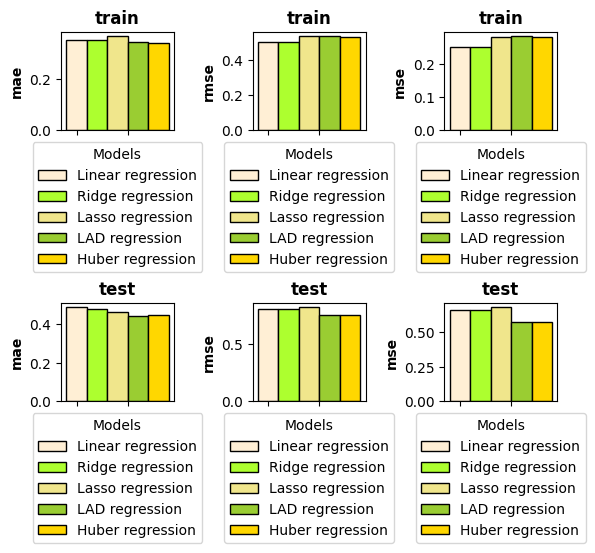

In [14]:
from training.results import plot_results


plot_results(results, measure_types=["mae", "rmse", "mse"])

##### Linear SVM

In [15]:
from sklearn.metrics import f1_score
from sklearn.svm import LinearSVR


clf_linear_svr = LinearSVR(loss="epsilon_insensitive", max_iter=10000, random_state=0)
clf_linear_svr.fit(X_train, y_train)

y_pred = clf_linear_svr.predict(X_test)

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


mean_absolute_error(y_test, y_pred)

0.44105963197069353

In [17]:
mean_squared_error(y_test, y_pred)

0.5320555394583479

In [25]:
from sklearn.model_selection import RandomizedSearchCV, KFold, GridSearchCV
from training.constants import RANDOM_STATE


clf_linear_svr = LinearSVR(loss="epsilon_insensitive", max_iter=10000, random_state=0)
folds = KFold(n_splits=5, shuffle=True, random_state=0)
hyper_params = {"C": [1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4, 1e5]}

model = GridSearchCV(
    estimator=clf_linear_svr,
    param_grid=hyper_params,
    scoring="neg_mean_squared_error",
    cv=5,
    verbose=2,
    return_train_score=True,
    n_jobs=-1,
)

In [26]:
model.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=LinearSVR(max_iter=10000, random_state=0),
             n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10.0, 100.0, 1000.0,
                               10000.0, 100000.0]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=2)

In [27]:
model.best_params_

{'C': 1}

In [30]:
import numpy as np


clf_linear_svr = LinearSVR(loss="epsilon_insensitive", max_iter=10000, random_state=0)
folds = KFold(n_splits=5, shuffle=True, random_state=0)
hyper_params = {"C": np.linspace(0.1, 100, num=1000)}

model = RandomizedSearchCV(
    estimator=clf_linear_svr,
    param_distributions=hyper_params,
    scoring="neg_mean_squared_error",
    cv=folds,
    verbose=2,
    return_train_score=True,
    n_iter=100,
    random_state=RANDOM_STATE,
    n_jobs=-1,
)

In [31]:
model.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\jolka\OneDrive\Dokumenty\mgr\Predictive-ML-in-TTRPG-game-design\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
                   estimator=LinearSVR(max_iter=10000, random_state=0),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'C': array([  0.1,   0.2,   0.3,   0.4,   0.5,   0.6,   0.7,   0.8,   0.9,
         1. ,   1.1,   1.2,   1.3,   1.4,   1.5,   1.6,   1.7,   1.8,
         1.9,   2. ,   2.1,   2.2,   2.3,   2.4,   2.5,   2.6,   2.7,
         2.8,   2.9,   3. ,   3.1,   3.2,   3.3,   3.4,   3.5,   3.6,
         3.7,   3.8,   3.9,   4. ,   4.1,   4.2,   4.3,   4.4,   4.5,
         4....
        94.6,  94.7,  94.8,  94.9,  95. ,  95.1,  95.2,  95.3,  95.4,
        95.5,  95.6,  95.7,  95.8,  95.9,  96. ,  96.1,  96.2,  96.3,
        96.4,  96.5,  96.6,  96.7,  96.8,  96.9,  97. ,  97.1,  97.2,
        97.3,  97.4,  97.5,  97.6,  97.7,  97.8,  97.9,  98. ,  98.1,
        98.2,  98.3,  98.4,  98.5,  98.6,  98.7,  98.8,  98.9,  99. ,
        99.1,  99.2,  99.3,  99.4,  99.5,  99.6,  99.7,  99.8,  99.9,
       100. ])},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_squared_error', verbose=2)

In [32]:
model.best_params_

{'C': 99.9}

In [41]:
clf_linear_svr = LinearSVR(loss="epsilon_insensitive", max_iter=10000, random_state=0)
folds = KFold(n_splits=5, shuffle=True, random_state=0)
hyper_params = {"C": np.linspace(90, 150, num=120)}

model = GridSearchCV(
    estimator=clf_linear_svr,
    param_grid=hyper_params,
    scoring="neg_mean_squared_error",
    cv=folds,
    verbose=2,
    return_train_score=True,
    n_jobs=-1,
)
model.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


C:\Users\jolka\OneDrive\Dokumenty\mgr\Predictive-ML-in-TTRPG-game-design\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=LinearSVR(max_iter=10000, random_state=0), n_jobs=-1,
             param_grid={'C': array([ 90.        ,  90.50420168,  91.00840336,  91.51260504,
        92.01680672,  92.5210084 ,  93.02521008,  93.52941176,
        94.03361345,  94.53781513,  95.04201681,  95.54621849,
        96.05042017,  96.55462185,  97.05882353,  97.56302521,
        98.06722689,  98.571428...
       138.40336134, 138.90756303, 139.41176471, 139.91596639,
       140.42016807, 140.92436975, 141.42857143, 141.93277311,
       142.43697479, 142.94117647, 143.44537815, 143.94957983,
       144.45378151, 144.95798319, 145.46218487, 145.96638655,
       146.47058824, 146.97478992, 147.4789916 , 147.98319328,
       148.48739496, 148.99159664, 149.49579832, 150.        ])},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=2)

In [43]:
model.best_params_

{'C': 107.64705882352942}

In [44]:
y_pred = model.predict(X_test)

mean_absolute_error(y_test, y_pred)

0.44618034018281366

In [45]:
mean_squared_error(y_test, y_pred)

0.5126827317161153

In [9]:
from training.train_and_evaluate_models import train_and_evaluate_models

results = train_and_evaluate_models(
    [
        "linear_regression",
        "linear_regression_ridge",
        "linear_regression_lasso",
        "lad_regression",
        "huber_regression",
        "linear_svm",
    ],
    X_train,
    y_train,
    X_test,
    y_test,
)

==== linear_regression ====
	--> train
		--> rmse: 0.5004325629728289
		--> mse: 0.25043275008355437
		--> mae: 0.3499345034317349
	--> test
		--> rmse: 0.8119215019113485
		--> mse: 0.6592165252659798
		--> mae: 0.4872711651826509

==== linear_regression_ridge ====
	--> train
		--> rmse: 0.5011735233513618
		--> mse: 0.251174900508418
		--> mae: 0.349536391320656
	--> test
		--> rmse: 0.81255791469997
		--> mse: 0.6602503647415636
		--> mae: 0.48108924910340406

==== linear_regression_lasso ====
	--> train
		--> rmse: 0.5314264520482728
		--> mse: 0.28241407393661516
		--> mae: 0.36404349999218777
	--> test
		--> rmse: 0.824181797001593
		--> mse: 0.679275634508775
		--> mae: 0.4616051509633608

Fitting 5 folds for each of 100 candidates, totalling 500 fits
==== lad_regression ====
	--> train
		--> rmse: 0.5320593836402999
		--> mse: 0.2830871877196958
		--> mae: 0.3429493248909897
	--> test
		--> rmse: 0.7581056908889712
		--> mse: 0.5747242385582444
		--> mae: 0.4444084558174069

Fi

C:\Users\jolka\OneDrive\Dokumenty\mgr\Predictive-ML-in-TTRPG-game-design\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [11]:
results

{'linear_regression': {'train': {'rmse': 0.5004325629728289,
   'mse': 0.25043275008355437,
   'mae': 0.3499345034317349},
  'test': {'rmse': 0.8119215019113485,
   'mse': 0.6592165252659798,
   'mae': 0.4872711651826509}},
 'linear_regression_ridge': {'train': {'rmse': 0.5011735233513618,
   'mse': 0.251174900508418,
   'mae': 0.349536391320656},
  'test': {'rmse': 0.81255791469997,
   'mse': 0.6602503647415636,
   'mae': 0.48108924910340406}},
 'linear_regression_lasso': {'train': {'rmse': 0.5314264520482728,
   'mse': 0.28241407393661516,
   'mae': 0.36404349999218777},
  'test': {'rmse': 0.824181797001593,
   'mse': 0.679275634508775,
   'mae': 0.4616051509633608}},
 'lad_regression': {'train': {'rmse': 0.5320593836402999,
   'mse': 0.2830871877196958,
   'mae': 0.3429493248909897},
  'test': {'rmse': 0.7581056908889712,
   'mse': 0.5747242385582444,
   'mae': 0.4444084558174069}},
 'huber_regression': {'train': {'rmse': 0.5294729368492895,
   'mse': 0.2803415908558118,
   'mae': 0

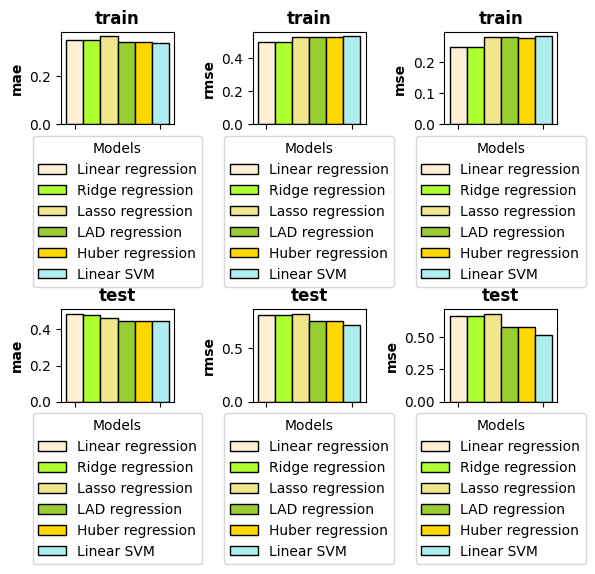

In [17]:
from training.results import plot_results

plot_results(results, measure_types=["mae", "rmse", "mse"])